improved version of <https://github.com/leelabcnbc/thesis-yimeng-v1/blob/master/results_ipynb/yuanyuan_8k_a_3day/maskcnn_polished_basic.ipynb>

In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from torchnetjson.builder import build_net

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training.training_aux import load_training_results
from thesis_v2.training_extra.misc import count_params
from thesis_v2.models.maskcnn_polished.builder import load_modules

load_modules()

In [4]:
folder_to_check = 'scripts/training/crcns_pvc8_large/maskcnn_polished'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator_obj
from key_utils import keygen

In [5]:
def load_everything():
    _df_collect = []
    for idx, param in enumerate(param_iterator_obj.generate()):
        if idx % 50 == 0:
            print(idx)
        
        assert len(param) == 16
#         assert param['split_seed'] == 'legacy'
        assert param['out_channel'] == 16
        assert param['num_layer'] == 2
        assert param['kernel_size_l1'] == 7
        assert param['pooling_ksize'] == 3
        assert param['pooling_type'] == 'avg'
        
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        # 10 to go.
        result = load_training_results(key, return_model=False)
        # load twice, first time to get the model.
        result = load_training_results(key, return_model=True, model=build_net(result['config_extra']['model']))
        num_epochs = [len(x) for x in result['stats_all']]
        _df_collect.append(
            {
                'split_seed': str(param['split_seed']),
                
                
                'act_fn': param['act_fn'],
                'bn_before_act': param['bn_before_act'],
                'bn_after_fc': param['bn_after_fc'],
                'shuffle_type': param['shuffle_type'],
                'loss_type': param['loss_type'],
                
                # 5 to go
                
                'scale': eval(param['scale']),
                # 
                'smoothness': float(param['smoothness']),
                # 
                
                # 1 to go
                
                
                'model_seed': param['model_seed'],
                'corr_test': result['stats_best']['stats']['test']['corr_mean'],
                'max_epoch': max(num_epochs),
                'num_param': count_params(result['model']),
            }
        )
        _df =  pd.DataFrame(_df_collect, columns=['split_seed', 'act_fn', 'bn_before_act', 'bn_after_fc',
                                                  'shuffle_type', 'loss_type', 'scale',
                                                  'smoothness',
                                                  'model_seed',
                                                  'corr_test', 'num_param',
                                                  'max_epoch',
                                                 ])
        _df = _df.set_index(['split_seed', 'act_fn', 'bn_before_act', 'bn_after_fc',
                             'shuffle_type', 'loss_type', 'scale',
                             'smoothness',
                             'model_seed',
                            ],verify_integrity=True)
    return _df

In [6]:
df = load_everything()

0
50
100
150
200
250


In [7]:
# check max_epoch, as long as all <40000, then good.
df['max_epoch'].min(), df['max_epoch'].max()

(551, 7551)

In [8]:
# compute mean corr.
df_corr_mean = df['corr_test'].unstack('model_seed').mean(axis=1)
df_corr_std = df['corr_test'].unstack('model_seed').std(axis=1)


In [9]:
df_corr_std

split_seed  act_fn    bn_before_act  bn_after_fc  shuffle_type  loss_type  scale    smoothness
0           relu      False          False        legacy        mse        0.01105  0.00002       0.000671
                                                                poisson    0.01105  0.00002       0.004538
                                                  paired        mse        0.01105  0.00002       0.007909
                                                                poisson    0.01105  0.00002       0.010553
                                     True         legacy        mse        0.01105  0.00002       0.015672
                                                                poisson    0.01105  0.00002       0.017017
                                                  paired        mse        0.01105  0.00002       0.023085
                                                                poisson    0.01105  0.00002       0.002994
                      True           False       

In [10]:
df_corr_mean.unstack('shuffle_type')
# different shuffle type can affect a lot.

shuffle_type                                                                  legacy  \
split_seed act_fn   bn_before_act bn_after_fc loss_type scale   smoothness             
0          relu     False         False       mse       0.01105 0.00002     0.727516   
                                              poisson   0.01105 0.00002     0.714077   
                                  True        mse       0.01105 0.00002     0.613049   
                                              poisson   0.01105 0.00002     0.574182   
                    True          False       mse       0.01105 0.00002     0.729144   
                                              poisson   0.01105 0.00002     0.717933   
                                  True        mse       0.01105 0.00002     0.640309   
                                              poisson   0.01105 0.00002     0.598790   
           softplus False         False       mse       0.01105 0.00002     0.676141   
                                              poisson   0.01105 0.00002     0.746699   
                                  True        mse       0.01105 0.00002     0.384214   
                                              poisson   0.01105 0.00002     0.528294   
                    True          False       mse       0.01105 0.00002     0.655139   
                                              poisson   0.01105 0.00002     0.733283   
                                  True        mse       0.01105 0.00002     0.631909   
                                              poisson   0.01105 0.00002     0.628136   
1          relu     False         False       mse       0.01105 0.00002     0.705856   
                                              poisson   0.01105 0.00002     0.700320   
                                  True        mse       0.01105 0.00002     0.598489   
                                              poisson   0.01105 0.00002     0.590258   
                    True          False       mse       0.01105 0.00002     0.710937   
                                              poisson   0.01105 0.00002     0.707191   
                                  True        mse       0.01105 0.00002     0.618099   
                                              poisson   0.01105 0.00002     0.598322   
           softplus False         False       mse       0.01105 0.00002     0.648168   
                                              poisson   0.01105 0.00002     0.725156   
                                  True        mse       0.01105 0.00002     0.584874   
                                              poisson   0.01105 0.00002     0.584830   
                    True          False       mse       0.01105 0.00002     0.623157   
                                              poisson   0.01105 0.00002     0.710099   
                                  True        mse       0.01105 0.00002     0.603582   
                                              poisson   0.01105 0.00002     0.612723   
2          relu     False         False       mse       0.01105 0.00002     0.693995   
                                              poisson   0.01105 0.00002     0.688992   
                                  True        mse       0.01105 0.00002     0.587000   
                                              poisson   0.01105 0.00002     0.535642   
                    True          False       mse       0.01105 0.00002     0.698532   
                                              poisson   0.01105 0.00002     0.683978   
                                  True        mse       0.01105 0.00002     0.600306   
                                              poisson   0.01105 0.00002     0.573836   
           softplus False         False       mse       0.01105 0.00002     0.646474   
                                              poisson   0.01105 0.00002     0.712924   
                                  True        mse       0.01105 0.00002     0.556240   
                                        

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatter(x, y, xlabel, ylabel, title, xlim, ylim):
    plt.close('all')
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title(title)
    plt.show()
    assert x.shape == y.shape and x.ndim == 1 == y.ndim
    print('number of pairs', x.size)
    print('y-x mean', (y-x).mean(), 'y-x>0 mean', ((y-x)>0).mean())
    print('y top', y.max(), 'x top', x.max())

In [12]:
# here, I need to check the effective ness of act_fn, bn_before_act, bn_after_fc, loss_type
def check_compare_one_case(series_in, label_to_unstack, xlim, ylim):
    df_unstacked = series_in.unstack(label_to_unstack)
    assert df_unstacked.shape[1] == 2
    labels = [str(x) for x in df_unstacked.columns.values]
    assert len(labels) == 2
    scatter(df_unstacked.values[:,0], df_unstacked.values[:,1], labels[0], labels[1], label_to_unstack,
           xlim, ylim)
    
    
    

In [13]:
def check_stuffs(df_in, cases_to_check, xlim, ylim):
    for case in cases_to_check:
        check_compare_one_case(df_in, case, xlim, ylim)

In [14]:
df_corr_mean.unstack('act_fn')

act_fn                                                                              relu  \
split_seed bn_before_act bn_after_fc shuffle_type loss_type scale   smoothness             
0          False         False       legacy       mse       0.01105 0.00002     0.727516   
                                                  poisson   0.01105 0.00002     0.714077   
                                     paired       mse       0.01105 0.00002     0.680486   
                                                  poisson   0.01105 0.00002     0.678638   
                         True        legacy       mse       0.01105 0.00002     0.613049   
                                                  poisson   0.01105 0.00002     0.574182   
                                     paired       mse       0.01105 0.00002     0.550548   
                                                  poisson   0.01105 0.00002     0.522146   
           True          False       legacy       mse       0.01105 0.00002     0.729144   
                                                  poisson   0.01105 0.00002     0.717933   
                                     paired       mse       0.01105 0.00002     0.695175   
                                                  poisson   0.01105 0.00002     0.682203   
                         True        legacy       mse       0.01105 0.00002     0.640309   
                                                  poisson   0.01105 0.00002     0.598790   
                                     paired       mse       0.01105 0.00002     0.594171   
                                                  poisson   0.01105 0.00002     0.555568   
1          False         False       legacy       mse       0.01105 0.00002     0.705856   
                                                  poisson   0.01105 0.00002     0.700320   
                                     paired       mse       0.01105 0.00002     0.694389   
                                                  poisson   0.01105 0.00002     0.698618   
                         True        legacy       mse       0.01105 0.00002     0.598489   
                                                  poisson   0.01105 0.00002     0.590258   
                                     paired       mse       0.01105 0.00002     0.587733   
                                                  poisson   0.01105 0.00002     0.568913   
           True          False       legacy       mse       0.01105 0.00002     0.710937   
                                                  poisson   0.01105 0.00002     0.707191   
                                     paired       mse       0.01105 0.00002     0.702850   
                                                  poisson   0.01105 0.00002     0.695136   
                         True        legacy       mse       0.01105 0.00002     0.618099   
                                                  poisson   0.01105 0.00002     0.598322   
                                     paired       mse       0.01105 0.00002     0.605647   
                                                  poisson   0.01105 0.00002     0.571374   
2          False         False       legacy       mse       0.01105 0.00002     0.693995   
                                                  poisson   0.01105 0.00002     0.688992   
                                     paired       mse       0.01105 0.00002     0.696641   
                                                  poisson   0.01105 0.00002     0.698672   
                         True        legacy       mse       0.01105 0.00002     0.587000   
                                                  poisson   0.01105 0.00002     0.535642   
                                     paired       mse       0.01105 0.00002     0.590761   
                                                  poisson   0.01105 0.00002     0.561647   
           True          False       legacy       mse       0.01105 0.00002     0.698532   
                                            

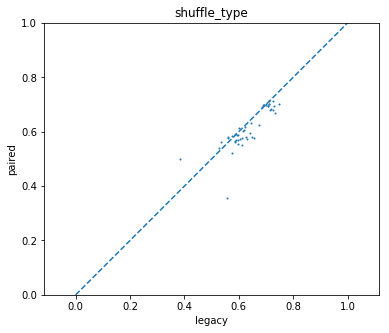

number of pairs 48
y-x mean -0.020532426318702397 y-x>0 mean 0.2916666666666667
y top 0.7145704070097721 x top 0.7466992348275214


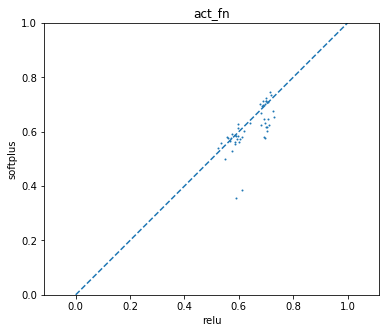

number of pairs 48
y-x mean -0.029041779547482924 y-x>0 mean 0.4166666666666667
y top 0.7466992348275214 x top 0.7291439185944437


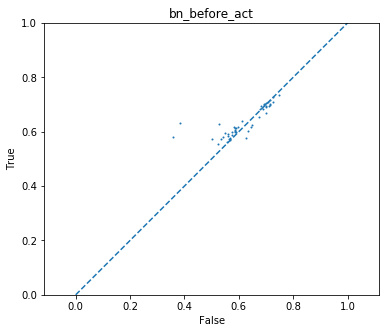

number of pairs 48
y-x mean 0.018422781221473474 y-x>0 mean 0.7083333333333334
y top 0.7332827223417087 x top 0.7466992348275214


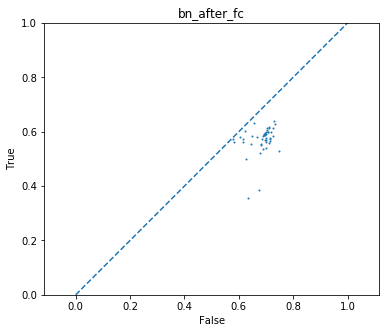

number of pairs 48
y-x mean -0.11181743643922132 y-x>0 mean 0.0
y top 0.6403090556968302 x top 0.7466992348275214


In [15]:
check_stuffs(df_corr_mean, ['shuffle_type', 'act_fn', 'bn_before_act', 'bn_after_fc'], xlim=(0,1), ylim=(0,1))
# for input size, seems that 100 is better than 50 for state-of-the-art, but worse in general.

In [16]:
df_corr_mean.unstack('shuffle_type').unstack('split_seed')

shuffle_type                                                       legacy  \
split_seed                                                              0   
act_fn   bn_before_act bn_after_fc loss_type scale   smoothness             
relu     False         False       mse       0.01105 0.00002     0.727516   
                                   poisson   0.01105 0.00002     0.714077   
                       True        mse       0.01105 0.00002     0.613049   
                                   poisson   0.01105 0.00002     0.574182   
         True          False       mse       0.01105 0.00002     0.729144   
                                   poisson   0.01105 0.00002     0.717933   
                       True        mse       0.01105 0.00002     0.640309   
                                   poisson   0.01105 0.00002     0.598790   
softplus False         False       mse       0.01105 0.00002     0.676141   
                                   poisson   0.01105 0.00002     0.746699   
                       True        mse       0.01105 0.00002     0.384214   
                                   poisson   0.01105 0.00002     0.528294   
         True          False       mse       0.01105 0.00002     0.655139   
                                   poisson   0.01105 0.00002     0.733283   
                       True        mse       0.01105 0.00002     0.631909   
                                   poisson   0.01105 0.00002     0.628136   

shuffle_type                                                               \
split_seed                                                              1   
act_fn   bn_before_act bn_after_fc loss_type scale   smoothness             
relu     False         False       mse       0.01105 0.00002     0.705856   
                                   poisson   0.01105 0.00002     0.700320   
                       True        mse       0.01105 0.00002     0.598489   
                                   poisson   0.01105 0.00002     0.590258   
         True          False       mse       0.01105 0.00002     0.710937   
                                   poisson   0.01105 0.00002     0.707191   
                       True        mse       0.01105 0.00002     0.618099   
                                   poisson   0.01105 0.00002     0.598322   
softplus False         False       mse       0.01105 0.00002     0.648168   
                                   poisson   0.01105 0.00002     0.725156   
                       True        mse       0.01105 0.00002     0.584874   
                                   poisson   0.01105 0.00002     0.584830   
         True          False       mse       0.01105 0.00002     0.623157   
                                   poisson   0.01105 0.00002     0.710099   
                       True        mse       0.01105 0.00002     0.603582   
                                   poisson   0.01105 0.00002     0.612723   

shuffle_type                                                               \
split_seed                                                              2   
act_fn   bn_before_act bn_after_fc loss_type scale   smoothness             
relu     False         False       mse       0.01105 0.00002     0.693995   
                                   poisson   0.01105 0.00002     0.688992   
                       True        mse       0.01105 0.00002     0.587000   
                                   poisson   0.01105 0.00002     0.535642   
         True          False       mse       0.01105 0.00002     0.698532   
                                   poisson   0.01105 0.00002     0.683978   
                       True        mse       0.01105 0.00002     0.600306   
                                   poisson   0.01105 0.00002     0.573836   
softplus False         False       mse       0.01105 0.00002     0.646474   
                                   poisson   0.01105 0.00002     0.712924   
                       True        mse       0.01105 0.00002     0.5562

In [17]:
df_corr_mean.unstack('split_seed').std(axis=1).unstack('act_fn')
# in some cases, softplus has super high cross seed var. so use relu might be better.

act_fn                                                                   relu  \
bn_before_act bn_after_fc shuffle_type loss_type scale   smoothness             
False         False       legacy       mse       0.01105 0.00002     0.016997   
                                       poisson   0.01105 0.00002     0.012562   
                          paired       mse       0.01105 0.00002     0.008750   
                                       poisson   0.01105 0.00002     0.011551   
              True        legacy       mse       0.01105 0.00002     0.013054   
                                       poisson   0.01105 0.00002     0.028067   
                          paired       mse       0.01105 0.00002     0.022394   
                                       poisson   0.01105 0.00002     0.025167   
True          False       legacy       mse       0.01105 0.00002     0.015397   
                                       poisson   0.01105 0.00002     0.017355   
                          paired       mse       0.01105 0.00002     0.004331   
                                       poisson   0.01105 0.00002     0.006508   
              True        legacy       mse       0.01105 0.00002     0.020042   
                                       poisson   0.01105 0.00002     0.014274   
                          paired       mse       0.01105 0.00002     0.009293   
                                       poisson   0.01105 0.00002     0.014951   

act_fn                                                               softplus  
bn_before_act bn_after_fc shuffle_type loss_type scale   smoothness            
False         False       legacy       mse       0.01105 0.00002     0.016661  
                                       poisson   0.01105 0.00002     0.017100  
                          paired       mse       0.01105 0.00002     0.027586  
                                       poisson   0.01105 0.00002     0.007700  
              True        legacy       mse       0.01105 0.00002     0.108534  
                                       poisson   0.01105 0.00002     0.028351  
                          paired       mse       0.01105 0.00002     0.105552  
                                       poisson   0.01105 0.00002     0.018125  
True          False       legacy       mse       0.01105 0.00002     0.020573  
                                       poisson   0.01105 0.00002     0.019727  
                          paired       mse       0.01105 0.00002     0.019833  
                                       poisson   0.01105 0.00002     0.018166  
              True        legacy       mse       0.01105 0.00002     0.035569  
                                       poisson   0.01105 0.00002     0.017517  
                          paired       mse       0.01105 0.00002     0.004873  
                                       poisson   0.01105 0.00002     0.005848

In [18]:
df_corr_mean.unstack('split_seed').std(axis=1).unstack('shuffle_type')
# paired has smaller std.

shuffle_type                                                       legacy  \
act_fn   bn_before_act bn_after_fc loss_type scale   smoothness             
relu     False         False       mse       0.01105 0.00002     0.016997   
                                   poisson   0.01105 0.00002     0.012562   
                       True        mse       0.01105 0.00002     0.013054   
                                   poisson   0.01105 0.00002     0.028067   
         True          False       mse       0.01105 0.00002     0.015397   
                                   poisson   0.01105 0.00002     0.017355   
                       True        mse       0.01105 0.00002     0.020042   
                                   poisson   0.01105 0.00002     0.014274   
softplus False         False       mse       0.01105 0.00002     0.016661   
                                   poisson   0.01105 0.00002     0.017100   
                       True        mse       0.01105 0.00002     0.108534   
                                   poisson   0.01105 0.00002     0.028351   
         True          False       mse       0.01105 0.00002     0.020573   
                                   poisson   0.01105 0.00002     0.019727   
                       True        mse       0.01105 0.00002     0.035569   
                                   poisson   0.01105 0.00002     0.017517   

shuffle_type                                                       paired  
act_fn   bn_before_act bn_after_fc loss_type scale   smoothness            
relu     False         False       mse       0.01105 0.00002     0.008750  
                                   poisson   0.01105 0.00002     0.011551  
                       True        mse       0.01105 0.00002     0.022394  
                                   poisson   0.01105 0.00002     0.025167  
         True          False       mse       0.01105 0.00002     0.004331  
                                   poisson   0.01105 0.00002     0.006508  
                       True        mse       0.01105 0.00002     0.009293  
                                   poisson   0.01105 0.00002     0.014951  
softplus False         False       mse       0.01105 0.00002     0.027586  
                                   poisson   0.01105 0.00002     0.007700  
                       True        mse       0.01105 0.00002     0.105552  
                                   poisson   0.01105 0.00002     0.018125  
         True          False       mse       0.01105 0.00002     0.019833  
                                   poisson   0.01105 0.00002     0.018166  
                       True        mse       0.01105 0.00002     0.004873  
                                   poisson   0.01105 0.00002     0.005848

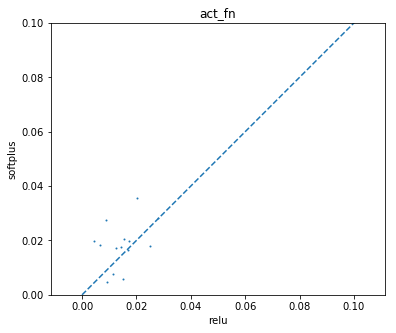

number of pairs 16
y-x mean 0.01443884923399669 y-x>0 mean 0.6875
y top 0.10853351272259797 x top 0.028067275592823304


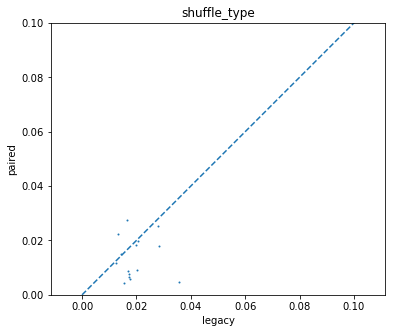

number of pairs 16
y-x mean -0.005697079196372204 y-x>0 mean 0.1875
y top 0.10555241324330283 x top 0.10853351272259797


In [19]:
check_stuffs(df_corr_mean.unstack('split_seed').std(axis=1), ['act_fn', 'shuffle_type'], xlim=(0, 0.1), ylim=(0,0.1))